In [3]:
pip install tensorflow


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [ ]:
import zipfile
import os

# Correct uploaded file path
uploaded_zip = "/content/archive (1).zip"   # ✅ FIXED

# Create extraction folder
extract_path = "/content/fer2013_dataset"
os.makedirs(extract_path, exist_ok=True)

# Extract ZIP
with zipfile.ZipFile(uploaded_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Dataset extracted to: /content/fer2013_dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import cv2
import os


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
dataset_path = "/content/fer2013_dataset"  # your extracted folder
train_dir = os.path.join(dataset_path, "train")  # if you have a train folder
test_dir = os.path.join(dataset_path, "test")    # test folder with face expressions


In [ ]:
os.listdir(test_dir)
# Example output: ['happy', 'sad', 'angry', 'surprise', ...]


['sad', 'happy', 'fear', 'neutral', 'disgust', 'angry', 'surprise']

In [ ]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Test/Validation data generator (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

# Load test images
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential()

# Conv Layer 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Conv Layer 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Conv Layer 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

# Flatten + Dense
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,743 (1.36 MB)

 Trainable params: 356,295 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 167s 365ms/step - accuracy: 0.2327 - loss: 2.0552 - val_accuracy: 0.2619 - val_loss: 1.7727
Epoch 2/50
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:00 270ms/step - accuracy: 0.1406 - loss: 1.9332

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.1406 - loss: 1.9332 - val_accuracy: 0.2641 - val_loss: 1.7718
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 163s 363ms/step - accuracy: 0.2759 - loss: 1.7685 - val_accuracy: 0.3280 - val_loss: 1.6233
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4062 - loss: 1.6312 - val_accuracy: 0.3368 - val_loss: 1.6090
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 206s 390ms/step - accuracy: 0.3011 - loss: 1.7057 - val_accuracy: 0.3730 - val_loss: 1.5676
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.3906 - loss: 1.6732 - val_accuracy: 0.3790 - val_loss: 1.5524
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 165s 368ms/step - accuracy: 0.3402 - loss: 1.6379 - val_accuracy: 0.4036 - val_loss: 1.5198
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.3750 - loss: 1.5311 - val_accuracy: 0.4029 - val_loss: 1.5185
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 201s 386ms/step - accuracy: 0.3678 - loss: 1.5976 - val_acc

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step


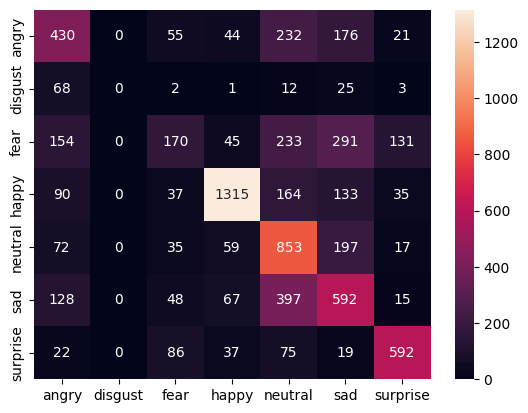

              precision    recall  f1-score   support

       angry       0.45      0.45      0.45       958
     disgust       0.00      0.00      0.00       111
        fear       0.39      0.17      0.23      1024
       happy       0.84      0.74      0.79      1774
     neutral       0.43      0.69      0.53      1233
         sad       0.41      0.47      0.44      1247
    surprise       0.73      0.71      0.72       831

    accuracy                           0.55      7178
   macro avg       0.46      0.46      0.45      7178
weighted avg       0.55      0.55      0.54      7178



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on test data
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "/content/fer2013_dataset/test/happy/happy1.jpg"
img = image.load_img(img_path, target_size=(48,48), color_mode='grayscale')
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
classes = list(train_generator.class_indices.keys())
print("Predicted Emotion:", classes[np.argmax(prediction)])


FileNotFoundError: [Errno 2] No such file or directory: '/content/fer2013_dataset/test/happy/happy1.jpg'

In [ ]:
happy_folder = os.path.join(test_dir, "happy")
print("Some happy images:", os.listdir(happy_folder)[:5])



Some happy images: ['PublicTest_61045546.jpg', 'PrivateTest_38910226.jpg', 'PublicTest_28647115.jpg', 'PrivateTest_47110154.jpg', 'PublicTest_24479979.jpg']


In [ ]:
from tensorflow.keras.preprocessing import image
import os

# Get a list of actual filenames in the happy folder
happy_images = os.listdir(happy_folder)

# Check if there are any images and use the first one found
if happy_images:
    actual_image_filename = happy_images[0] # Using the first image found
    img_path = os.path.join(happy_folder, actual_image_filename)
    print(f"Using image: {img_path}")

    img = image.load_img(img_path, target_size=(48,48), color_mode='grayscale')
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    classes = list(train_generator.class_indices.keys())
    print("Predicted Emotion:", classes[np.argmax(prediction)])
else:
    print(f"No images found in {happy_folder}")

Using image: /content/fer2013_dataset/test/happy/PublicTest_61045546.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
Predicted Emotion: happy


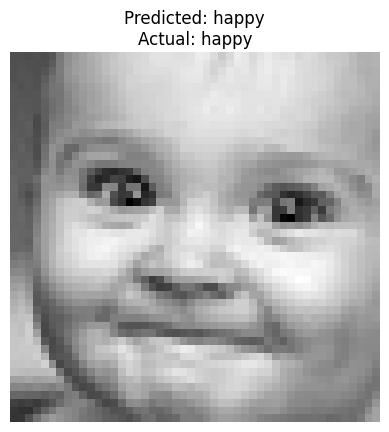

In [ ]:
predicted_class = classes[np.argmax(prediction)]
actual_class = os.path.basename(os.path.dirname(img_path))

plt.imshow(img_array[0].reshape(48,48), cmap='gray')
plt.title(f"Predicted: {predicted_class}\nActual: {actual_class}")
plt.axis('off')
plt.show()